In [537]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from scipy import stats
from scipy.stats import linregress, t as t_dist
import statsmodels.api as sm
import math
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [538]:
temp_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "berkeleyearth/climate-change-earth-surface-temperature-data",
  "GlobalTemperatures.csv",
)

In [539]:
temp_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [540]:
temp_df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [541]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [542]:
temp_df[temp_df.isna().any(axis=1)]

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1195,1849-08-01,13.603,0.902,NaN,NaN,NaN,NaN,NaN,NaN
1196,1849-09-01,11.093,0.568,NaN,NaN,NaN,NaN,NaN,NaN
1197,1849-10-01,8.890,0.733,NaN,NaN,NaN,NaN,NaN,NaN
1198,1849-11-01,5.778,1.313,NaN,NaN,NaN,NaN,NaN,NaN


In [543]:
temp_df.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [544]:
temp_df[temp_df['LandAverageTemperature'].isnull()]

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
10,1750-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1751-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,1751-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,1751-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1751-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1751-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1752-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1752-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1752-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1752-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [545]:
temp_df.dropna(subset=['LandAverageTemperature'], inplace=True)

In [546]:
temp_df_copy = temp_df.copy()

In [547]:
df = temp_df_copy[['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty']]

In [548]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072


In [549]:
## Check if there are duplicate rows
df['dt'].duplicated().sum()

np.int64(0)

In [550]:
# Create a time variable (years since start)
df['dt'] = pd.to_datetime(df['dt'])
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month
df['time_numeric'] = (df['dt'] - df['dt'].min()).dt.days / 365.25  # Convert to years

## Get annual data from the csv file

In [551]:
# Group data by year
annual = (
    df.groupby('year')[['LandAverageTemperature','LandAverageTemperatureUncertainty']]
    .mean()
    .reset_index()
)

annual.head()

,year,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


# Extract data for each decade from the csv file

## Boxplot for all data(original, monthly)

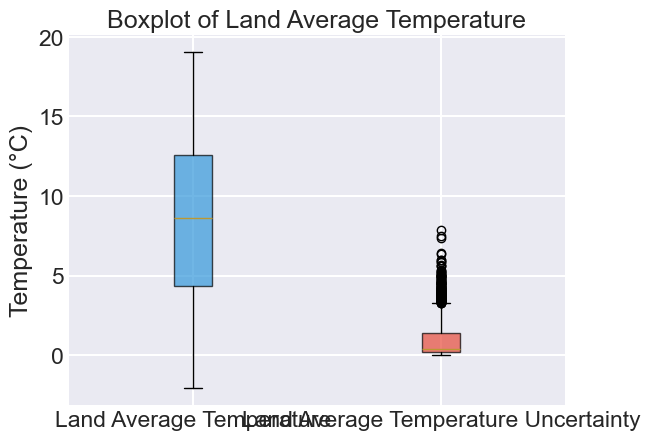

In [552]:
# Define colors for the two variables
colors = ['#3498db', '#e74c3c']  # Blue and Red

bp = plt.boxplot(x=df[['LandAverageTemperature', 'LandAverageTemperatureUncertainty']], 
                 vert=True, patch_artist=True, 
                 labels=['Land Average Temperature', 'Land Average Temperature Uncertainty'])

# Apply colors to boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('Boxplot of Land Average Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1234aee90>,
 'caps': [<matplotlib.lines.Line2D at 0x1234ae210>,
 'boxes': [<matplotlib.lines.Line2D at 0x1234aed50>],
 'medians': [<matplotlib.lines.Line2D at 0x1234aec10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1234af4d0>],
 'means': []}

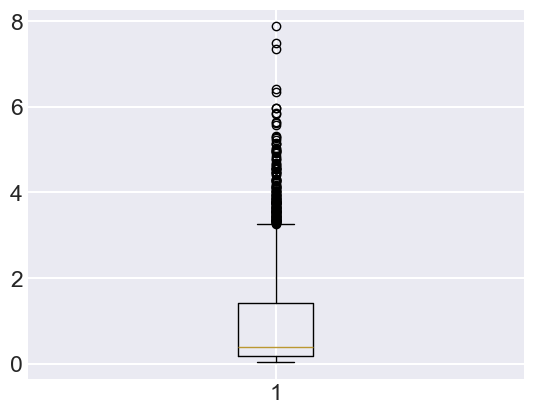

In [553]:
plt.boxplot(x=df['LandAverageTemperatureUncertainty'])

## Scatter plot for uncertainity over annual data

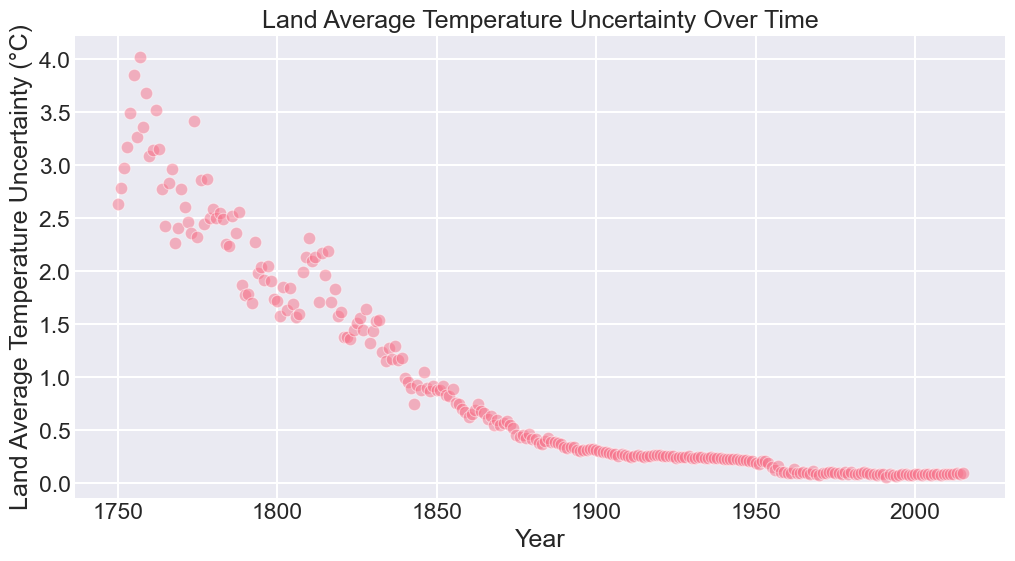

In [554]:
# Scatter plot land average temperature uncertainty across time

plt.figure(figsize=(12, 6))
sns.scatterplot(data=annual, x='year', y='LandAverageTemperatureUncertainty', alpha=0.5)
plt.title('Land Average Temperature Uncertainty Over Time')
plt.xlabel('Year')
plt.ylabel('Land Average Temperature Uncertainty (°C)')
plt.show()

## Data visualization for original monthwise data

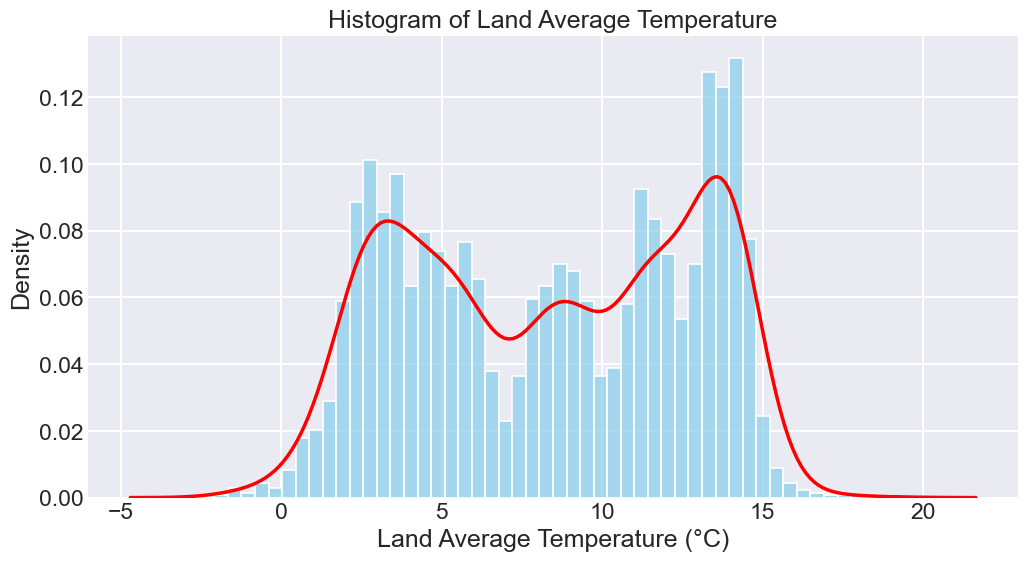

In [555]:
## Histogram of Land Average Temperature by date

plt.figure(figsize=(12,6))
# Plot histogram without KDE
sns.histplot(data=df, x='LandAverageTemperature', bins=50, color='skyblue', alpha=0.7, stat='density')
# Plot KDE separately with custom color
sns.kdeplot(data=df, x='LandAverageTemperature', color='red', linewidth=2.5)
plt.title('Histogram of Land Average Temperature')
plt.xlabel('Land Average Temperature (°C)')
plt.ylabel('Density')
plt.show()

## Data visualization for original annual data

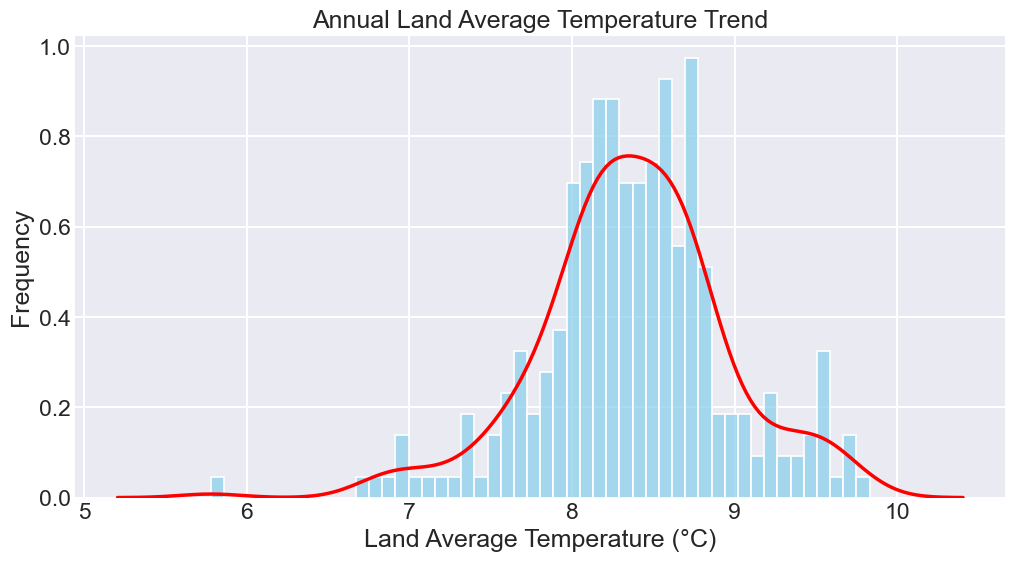

In [556]:
# Annual Land Average Temperature Trend

plt.figure(figsize=(12, 6))
sns.histplot(data=annual, x='LandAverageTemperature', bins=50, color='skyblue', alpha=0.7, stat='density')
sns.kdeplot(data=annual, x='LandAverageTemperature', color='red', linewidth=2.5)
plt.title('Annual Land Average Temperature Trend')
plt.xlabel('Land Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

## Data visualization for Decade data
- Decadal mean temperature

In [557]:
# Decade dataframe for decade analysis
decade = df.copy()
decade['decade'] = (decade['dt'].dt.year // 10) * 10
decade = (
    decade.groupby('decade')[['LandAverageTemperature','LandAverageTemperatureUncertainty']]
    .mean()
    .reset_index()
)

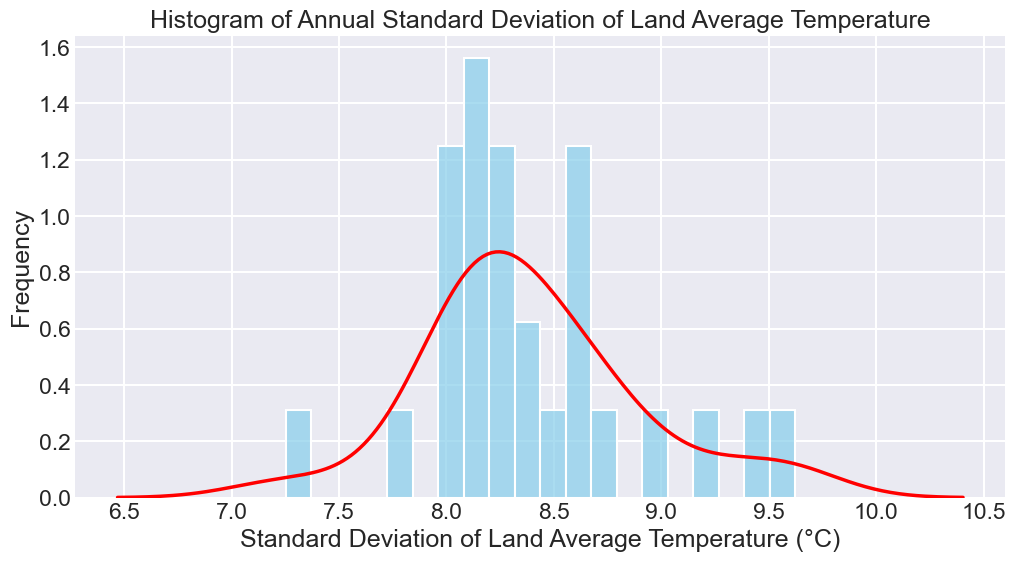

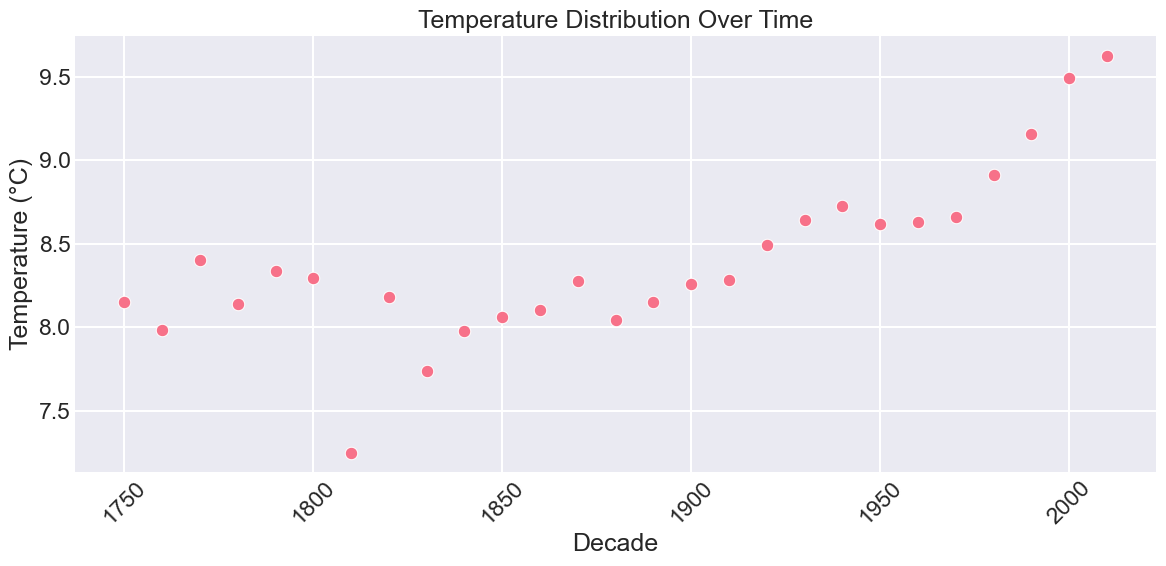

In [558]:
plt.figure(figsize=(12,6))
sns.histplot(data=decade, x='LandAverageTemperature', bins=20, color='skyblue', alpha=0.7, stat='density')
sns.kdeplot(data=decade, x='LandAverageTemperature', color='red', linewidth=2.5)
plt.title('Histogram of Annual Standard Deviation of Land Average Temperature') 
plt.xlabel('Standard Deviation of Land Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


# Create figure with subplots
fig = plt.figure(figsize=(12, 6))

sns.scatterplot(data=decade,  y='LandAverageTemperature', x='decade')
plt.title('Temperature Distribution Over Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Decade')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Indicator Analysis
- Annual standard deviation

In [559]:
annual_std = (
    df.groupby('year')[['LandAverageTemperature','LandAverageTemperatureUncertainty']]
    .std()
    .reset_index()
)
annual_std.head()

,year,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,4.850538,0.647770
1,1751,5.274027,0.709716
2,1752,2.926488,0.478218
3,1753,5.511233,1.147459
4,1754,5.351652,1.504625


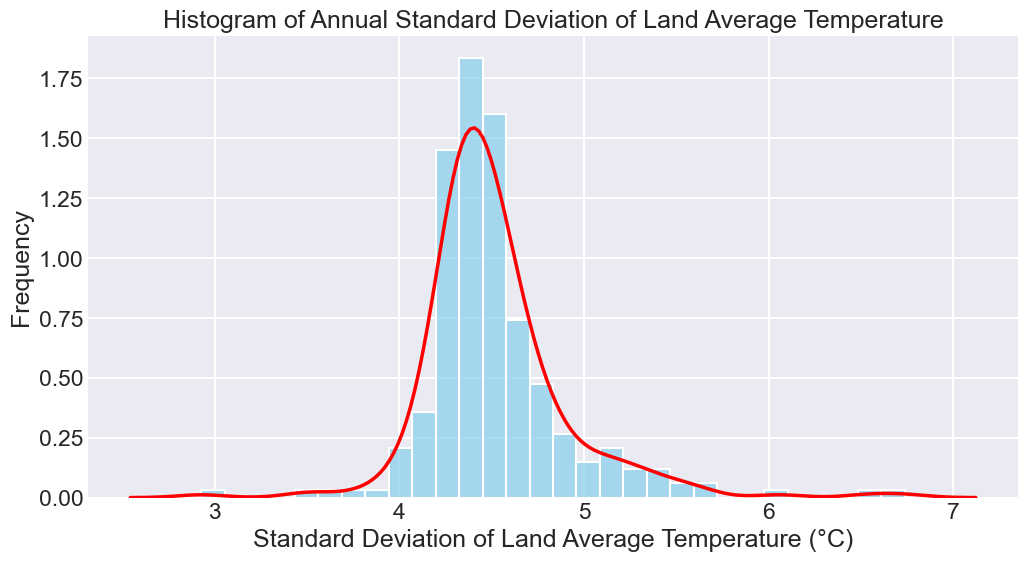

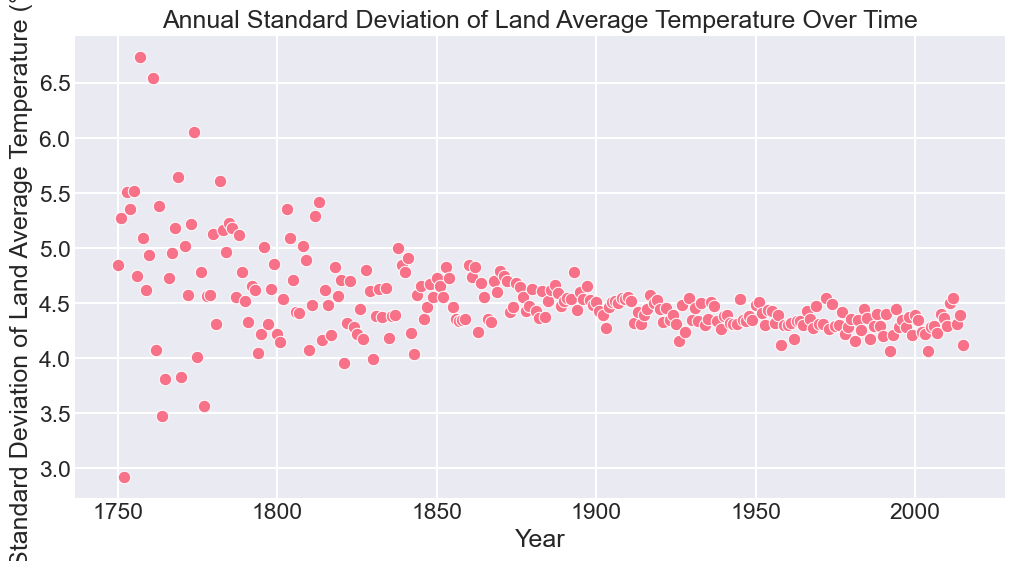

In [560]:
#plot histogram for annual std dev of land average temperature
plt.figure(figsize=(12,6))
sns.histplot(data=annual_std, x='LandAverageTemperature', bins=30, color='skyblue', alpha=0.7, stat='density')
sns.kdeplot(data=annual_std, x='LandAverageTemperature', color='red', linewidth=2.5)
plt.title('Histogram of Annual Standard Deviation of Land Average Temperature') 
plt.xlabel('Standard Deviation of Land Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


#plot std dev against years
plt.figure(figsize=(12,6))
sns.scatterplot(data=annual_std, x='year', y='LandAverageTemperature') 
plt.title('Annual Standard Deviation of Land Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Standard Deviation of Land Average Temperature (°C)')
plt.show()

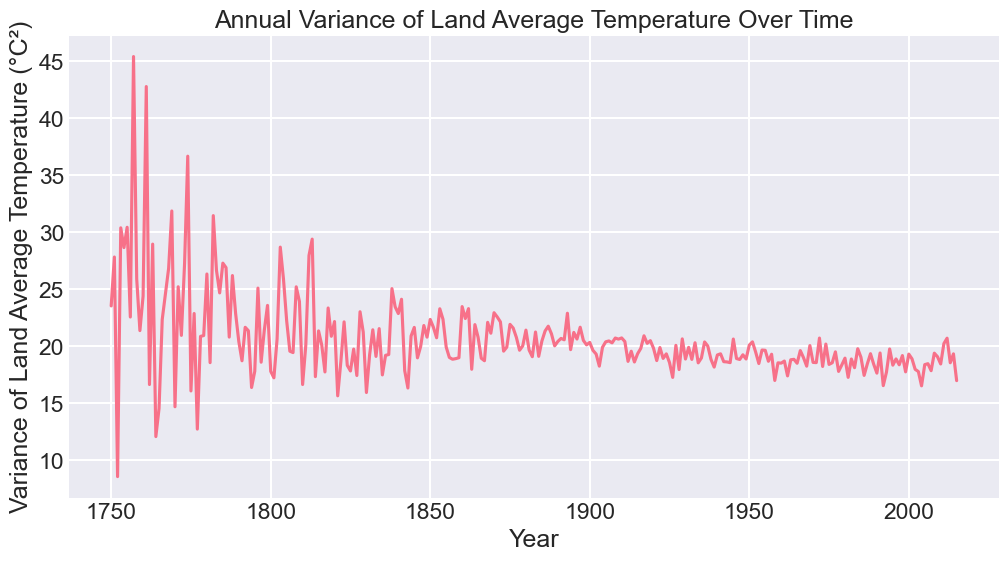

In [561]:
# Annual Variance of Land Average Temperature Over Time
annaual_var = (
    df.groupby('year')['LandAverageTemperature'].var().reset_index()
)   
plt.figure(figsize=(12,6))
sns.lineplot(data=annaual_var, x='year', y='LandAverageTemperature')
plt.title('Annual Variance of Land Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Variance of Land Average Temperature (°C²)')
plt.show()




## Confidence Intervals
### Annual land average temperature
- Confirm the distribution with a QQ-Plot. Previously, we see a bell-shaped distribution.
- Because the annual standard deviation is unknown, we use the student distribution to compute the 95% confidence interval of the annual mean.

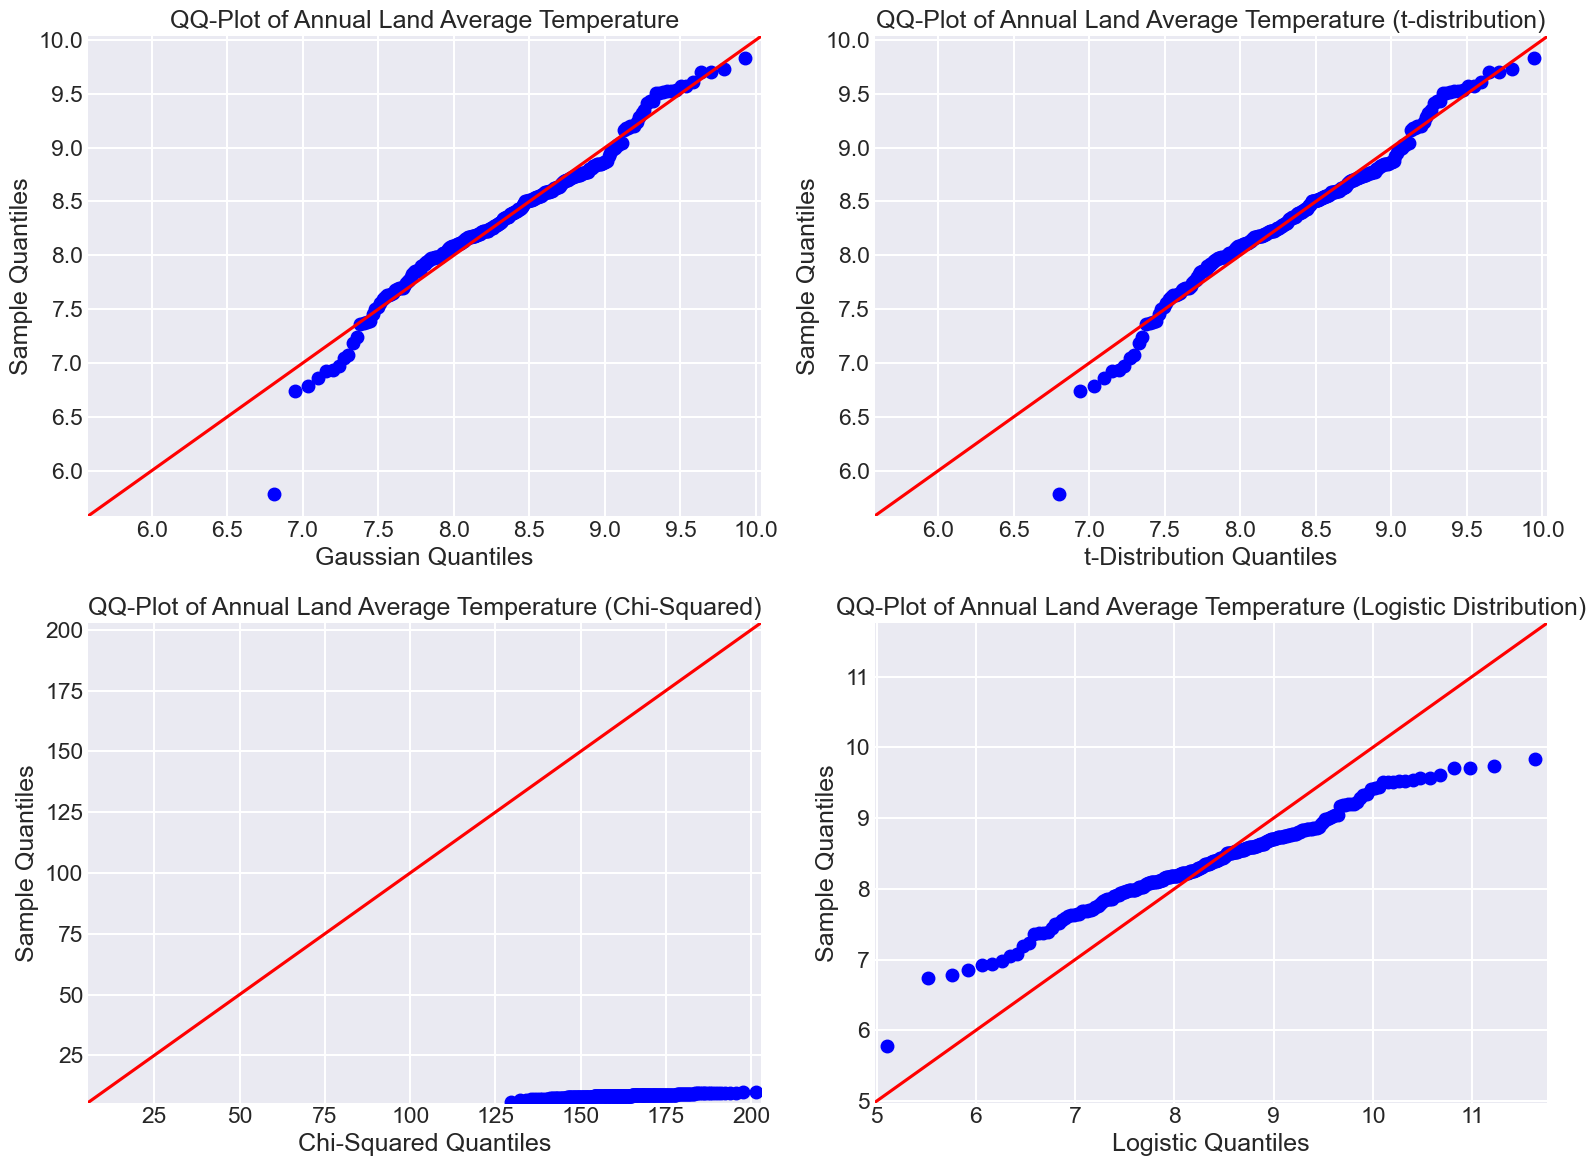

In [562]:
# QQ-plots for Annual Land Average Temperature
n = len(annual['LandAverageTemperature'])
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sm.qqplot(annual['LandAverageTemperature'], dist=stats.norm, loc=np.mean(annual['LandAverageTemperature']), 
          scale=np.std(annual['LandAverageTemperature']), line='45', ax=axes[0, 0], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[0, 0].get_lines()[0].set_color('red')  # Reference line
axes[0, 0].set_title('QQ-Plot of Annual Land Average Temperature')
axes[0, 0].set_xlabel('Gaussian Quantiles')
axes[0, 0].set_ylabel('Sample Quantiles')

sm.qqplot(annual['LandAverageTemperature'], dist=stats.t, distargs=(n-1,), loc=np.mean(annual['LandAverageTemperature']),
            scale=np.std(annual['LandAverageTemperature']), line='45', ax=axes[0, 1], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[0, 1].get_lines()[0].set_color('red')  # Reference line
axes[0, 1].set_title('QQ-Plot of Annual Land Average Temperature (t-distribution)')
axes[0, 1].set_xlabel('t-Distribution Quantiles')
axes[0, 1].set_ylabel('Sample Quantiles')

sm.qqplot(annual['LandAverageTemperature'], dist=stats.chi2, distargs=(n-1,), loc=np.mean(annual['LandAverageTemperature']),
            scale=np.std(annual['LandAverageTemperature']), line='45', ax=axes[1, 0], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[1, 0].get_lines()[0].set_color('red')  # Reference line
axes[1, 0].set_title('QQ-Plot of Annual Land Average Temperature (Chi-Squared)')
axes[1, 0].set_xlabel('Chi-Squared Quantiles')
axes[1, 0].set_ylabel('Sample Quantiles')

sm.qqplot(annual['LandAverageTemperature'], dist=stats.logistic, loc=np.mean(annual['LandAverageTemperature']),
            scale=np.std(annual['LandAverageTemperature']), line='45', ax=axes[1, 1], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[1, 1].get_lines()[0].set_color('red')  # Reference line
axes[1, 1].set_title('QQ-Plot of Annual Land Average Temperature (Logistic Distribution)')
axes[1, 1].set_xlabel('Logistic Quantiles')
axes[1, 1].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()



In [563]:
# We use the Student's t-distribution (instead of the normal distribution) because:
# 1. The population standard deviation is UNKNOWN - we only have the sample standard deviation
# 2. We have a finite sample size (n=266 years of annual data)
# 3. The t-distribution accounts for the additional uncertainty from estimating σ from the sample
# 4. From the QQ-plots above, the annual temperatures follow a t-distribution better than other distributions
# 5. This is the standard approach for constructing confidence intervals when σ is unknown

alpha = 0.05
mu_hat = np.mean(annual['LandAverageTemperature'])
sigma_hat = np.std(annual['LandAverageTemperature'], ddof=1)
se_hat = stats.sem(annual['LandAverageTemperature'])

# Critical t-value
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)

# Margin of error
a = t_crit*sigma_hat/np.sqrt(n)

# Confidence interval
CI_annual_mean =[mu_hat - a, mu_hat + a]

print(f"95% Confidence Interval for Annual Land Average Temperature Mean: \n({CI_annual_mean[0]:.4f}, {CI_annual_mean[1]:.4f}) °C")
print(f"Sample mean: {mu_hat:.4f} °C (includes in the confidence interval)")

95% Confidence Interval for Annual Land Average Temperature Mean: 
(8.2987, 8.4400) °C
Sample mean: 8.3693 °C (includes in the confidence interval)


### Annual standard deviation temperature
- Associate the distribution with a statistic law. 
    - Plot its histogram : A long rigth tail is observed. The distribution is asymmetric.
    - Plot its qq-plots : None of the classical parametric models (χ², F, lognormal, gamma) provides a perfect fit.
- distribution-free bootstrap procedures to compute confidence intervals for annual indicators and apply Extreme Value Theory (POT / GPD) to model tail behaviour.

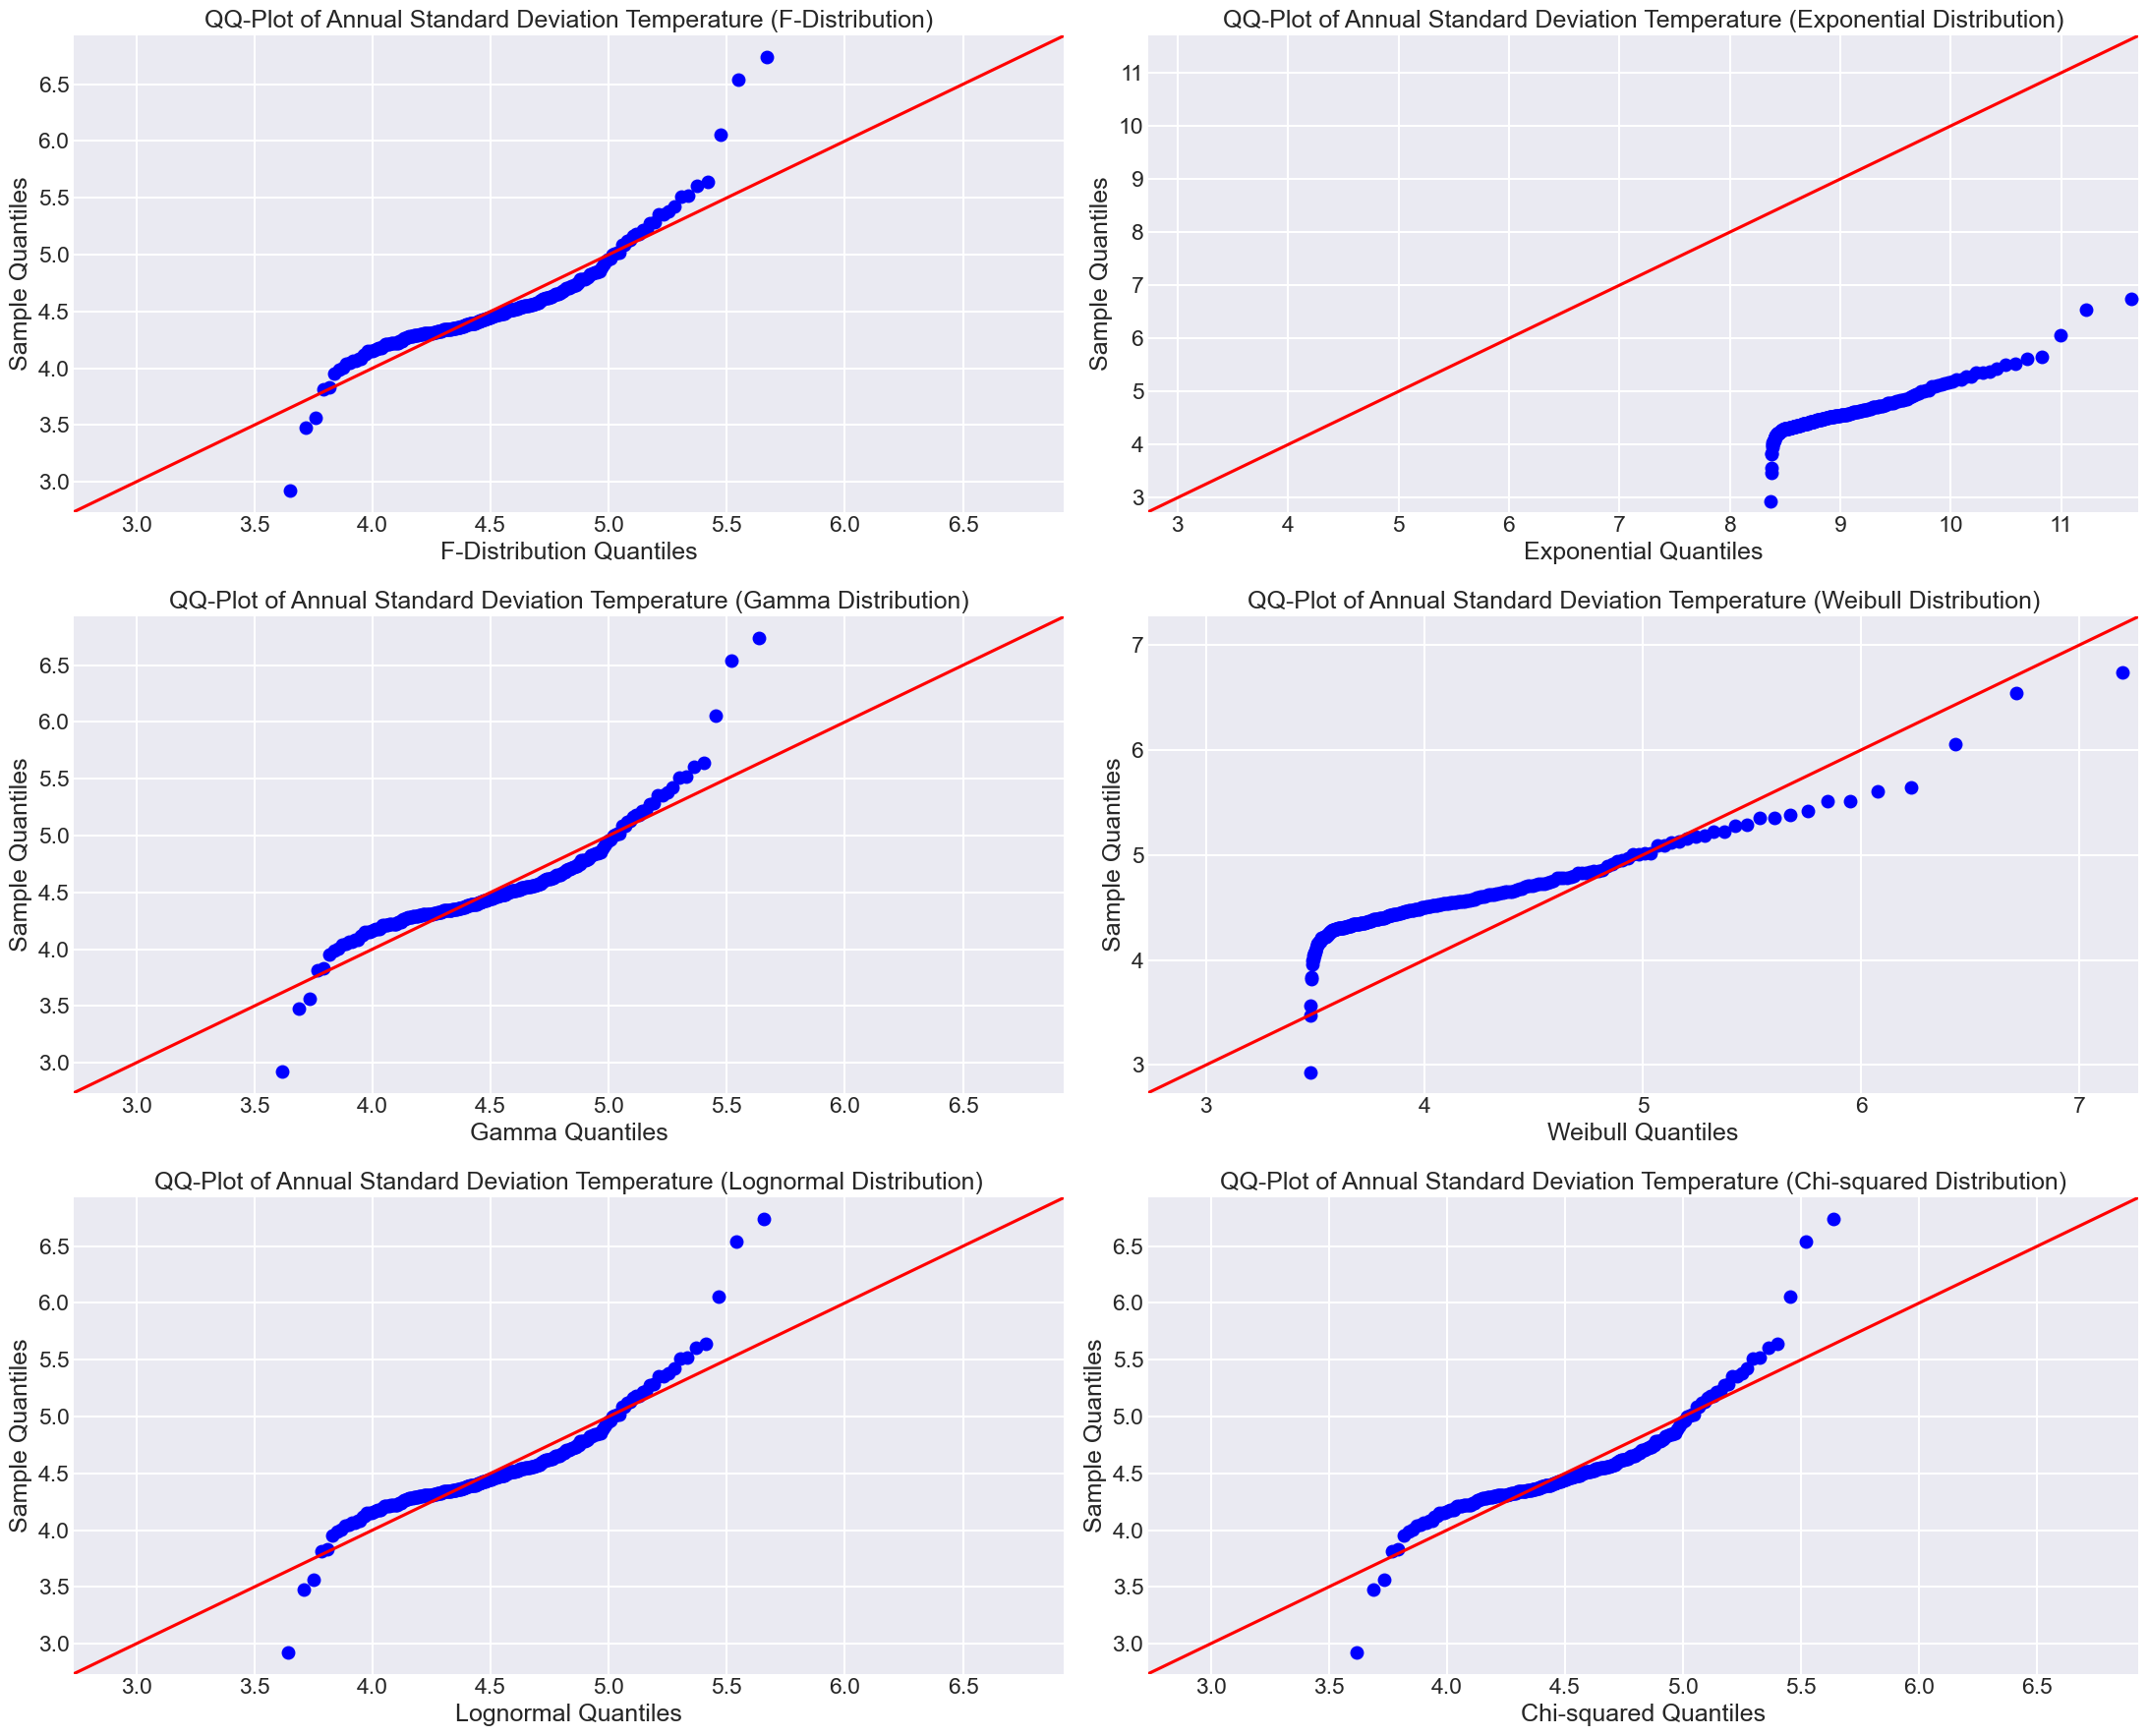

In [564]:
# QQ-plots for Annual Standard Deviation Temperature
n = len(annual_std['LandAverageTemperature'])
fig, axes = plt.subplots(3, 2, figsize=(22, 18))

# Fit MLE parameters for F-distribution
dfn, dfd, loc, scale = stats.f.fit(annual_std['LandAverageTemperature'])

sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.f, distargs=(dfn,dfd,), loc=loc,
            scale=scale, line='45', ax=axes[0, 0], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[0, 0].get_lines()[0].set_color('red')  # Reference line
axes[0, 0].set_title('QQ-Plot of Annual Standard Deviation Temperature (F-Distribution)')
axes[0, 0].set_xlabel('F-Distribution Quantiles')
axes[0, 0].set_ylabel('Sample Quantiles')


sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.expon, loc=np.mean(annual['LandAverageTemperature']),
            scale=np.std(annual['LandAverageTemperature']), line='45', ax=axes[0, 1], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[0, 1].get_lines()[0].set_color('red')  # Reference line
axes[0, 1].set_title('QQ-Plot of Annual Standard Deviation Temperature (Exponential Distribution)')
axes[0, 1].set_xlabel('Exponential Quantiles')
axes[0, 1].set_ylabel('Sample Quantiles')

# Fit MLE parameters for Gamma distribution
shape, loc, scale = stats.gamma.fit(annual_std['LandAverageTemperature'])

sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.gamma, distargs=(shape,), loc=loc, scale=scale, line='45', ax=axes[1, 0], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[1, 0].get_lines()[0].set_color('red')  # Reference line
axes[1, 0].set_title('QQ-Plot of Annual Standard Deviation Temperature (Gamma Distribution)')
axes[1, 0].set_xlabel('Gamma Quantiles')
axes[1, 0].set_ylabel('Sample Quantiles')

# Fit MLE parameters for Weibull distribution
shape, loc, scale = stats.weibull_min.fit(annual_std['LandAverageTemperature'])

sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.weibull_min, distargs=(shape,), loc=loc, scale=scale, line='45', ax=axes[1, 1], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[1, 1].get_lines()[0].set_color('red')  # Reference line
axes[1, 1].set_title('QQ-Plot of Annual Standard Deviation Temperature (Weibull Distribution)')
axes[1, 1].set_xlabel('Weibull Quantiles')
axes[1, 1].set_ylabel('Sample Quantiles')

# Fit MLE parameters for Lognormal distribution
shape, loc, scale = stats.lognorm.fit(annual_std['LandAverageTemperature'])

sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.lognorm, distargs=(shape,), loc=loc, scale=scale, line='45', ax=axes[2, 0], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[2, 0].get_lines()[0].set_color('red')  # Reference line
axes[2, 0].set_title('QQ-Plot of Annual Standard Deviation Temperature (Lognormal Distribution)')
axes[2, 0].set_xlabel('Lognormal Quantiles')
axes[2, 0].set_ylabel('Sample Quantiles')

# Fit MLE parameters for Chi-squared distribution
shape, loc, scale = stats.chi2.fit(annual_std['LandAverageTemperature'])

sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.chi2, distargs=(shape,), loc=loc, scale=scale, line='45', ax=axes[2, 1], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[2, 1].get_lines()[0].set_color('red')  # Reference line
axes[2, 1].set_title('QQ-Plot of Annual Standard Deviation Temperature (Chi-squared Distribution)')
axes[2, 1].set_xlabel('Chi-squared Quantiles')
axes[2, 1].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

In [565]:
data = annual_std['LandAverageTemperature']

distributions = {
    'F': stats.f,
    'Expon': stats.expon,
    'Gamma': stats.gamma,
    'Weibull_min': stats.weibull_min,
    'Lognorm': stats.lognorm,
    'Chi2': stats.chi2
}

results = []

for name, dist in distributions.items():
    params = dist.fit(data)
    ks_stat, ks_p = stats.kstest(data, name.lower(), args=params)
    
    # Log-likelihood for AIC/BIC
    loglik = np.sum(dist.logpdf(data, *params))
    k = len(params)
    n = len(data)
    aic = 2*k - 2*loglik
    bic = k*np.log(n) - 2*loglik
    
    results.append({
        'Distribution': name,
        'KS Statistic': ks_stat,
        'KS p-value': ks_p,
        'AIC': aic,
        'BIC': bic
    })

df_results = pd.DataFrame(results).sort_values(by='AIC')
print(df_results)

  Distribution  KS Statistic    KS p-value         AIC         BIC
4      Lognorm      0.126916  3.405597e-04  233.981951  244.732440
0            F      0.124692  4.602085e-04  233.992692  248.326677
5         Chi2      0.131806  1.723866e-04  238.415618  249.166107
2        Gamma      0.131806  1.723895e-04  238.415618  249.166107
1        Expon      0.476212  6.105674e-56  783.451450  790.618442
3  Weibull_min      0.608677  4.307054e-95         inf         inf


## Hypothesis Testing: Are there significant changes in temperature over time?

**Null Hypothesis (H₀)**: There is no significant trend in global land temperatures over time (slope = 0)

**Alternative Hypothesis (H₁)**: There is a significant trend in global land temperatures over time (slope ≠ 0)

We'll use multiple statistical tests to evaluate this hypothesis.

### Test 1: Linear Regression Analysis

Testing if there's a statistically significant linear trend in temperature over time.

In [566]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(annual['year'], 
                                                          annual['LandAverageTemperature'])

print("=" * 60)
print("LINEAR REGRESSION TEST")
print("=" * 60)
print(f"Slope: {slope:.6f} °C/year")
print(f"Intercept: {intercept:.4f} °C")
print(f"R-squared: {r_value**2:.6f}")
print(f"P-value: {p_value:.2e}")
print(f"Standard error: {std_err:.6f}")
print("=" * 60)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(f"REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"There IS a statistically significant trend in temperature over time.")
    print(f"Temperature is changing at a rate of {slope:.6f} °C/year")
    if slope > 0:
        print(f"The trend is INCREASING (warming)")
    else:
        print(f"The trend is DECREASING (cooling)")
else:
    print(f"FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print(f"There is NO statistically significant trend in temperature over time.")

print("=" * 60)

LINEAR REGRESSION TEST
Slope: 0.004732 °C/year
Intercept: -0.5381 °C
R-squared: 0.387303
P-value: 6.47e-30
Standard error: 0.000366
REJECT NULL HYPOTHESIS (p < 0.05)
There IS a statistically significant trend in temperature over time.
Temperature is changing at a rate of 0.004732 °C/year
The trend is INCREASING (warming)


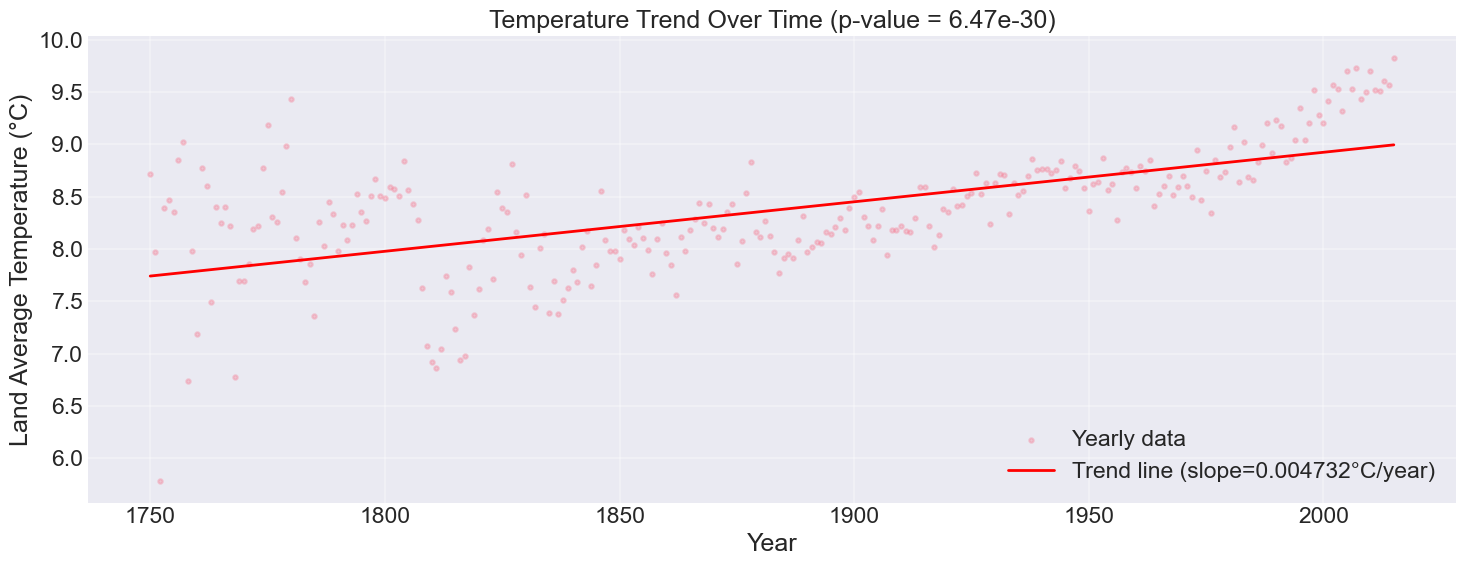

In [567]:
# Visualize the trend
plt.figure(figsize=(15, 6))

# Plot the data
plt.scatter(annual['year'], annual['LandAverageTemperature'], 
            alpha=0.3, s=10, label='Yearly data')

# Plot the regression line
regression_line = slope * annual['year'] + intercept
plt.plot(annual['year'], regression_line, 
         color='red', linewidth=2, label=f'Trend line (slope={slope:.6f}°C/year)')

plt.xlabel('Year')
plt.ylabel('Land Average Temperature (°C)')
plt.title(f'Temperature Trend Over Time (p-value = {p_value:.2e})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Test 2: Mann-Kendall Trend Test

A non-parametric test that doesn't assume linearity. Good for detecting monotonic trends.

MANN–KENDALL TREND TEST
Test statistic (Z): 11.7208
Kendall Tau: 0.4823
P-value: 0.000e+00
Trend: increasing
Sen’s slope: 0.005203 °C/year
REJECT NULL HYPOTHESIS (p < 0.05)
There IS a statistically significant monotonic trend.
Trend direction: INCREASING (Sen’s slope = 0.0052 °C/year)


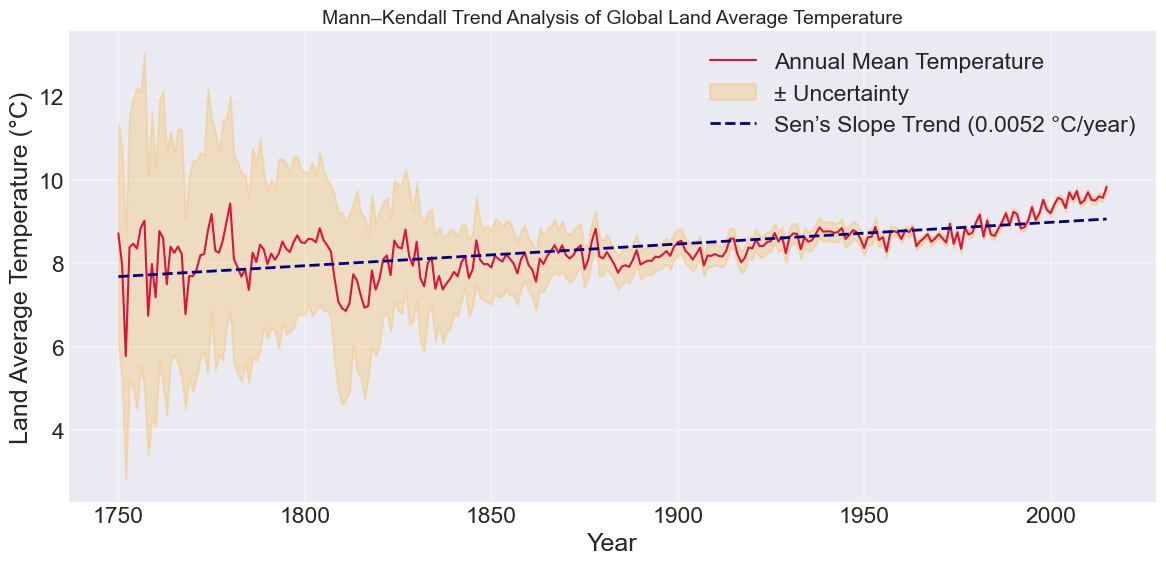

In [568]:
import pymannkendall as mk

# Perform Mann-Kendall test
result = mk.original_test(annual['LandAverageTemperature'])
alpha = 0.05  # 5% significance level

print("=" * 60)
print("MANN–KENDALL TREND TEST")
print("=" * 60)
print(f"Test statistic (Z): {result.z:.4f}")
print(f"Kendall Tau: {result.Tau:.4f}")
print(f"P-value: {result.p:.3e}")
print(f"Trend: {result.trend}")
print(f"Sen’s slope: {result.slope:.6f} °C/year")
print("=" * 60)

# Step 4: Interpret results
if result.p < alpha:
    print(f"REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"There IS a statistically significant monotonic trend.")
    print(f"Trend direction: {result.trend.upper()} (Sen’s slope = {result.slope:.4f} °C/year)")
else:
    print(f"FAIL TO REJECT NULL HYPOTHESIS (p ≥ {alpha})")
    print(f"No statistically significant monotonic trend detected.")
print("=" * 60)

plt.figure(figsize=(12, 6))
plt.plot(
    annual['year'],
    annual['LandAverageTemperature'],
    color='crimson',
    linewidth=1.5,
    label='Annual Mean Temperature'
)

if 'LandAverageTemperatureUncertainty' in annual.columns:
    plt.fill_between(
        annual['year'],
        annual['LandAverageTemperature'] - annual['LandAverageTemperatureUncertainty'],
        annual['LandAverageTemperature'] + annual['LandAverageTemperatureUncertainty'],
        color='orange', alpha=0.2, label='± Uncertainty'
    )

x = annual['year']
y = annual['LandAverageTemperature']
median_temp = y.median()
sen_line = result.slope * (x - x.median()) + median_temp

plt.plot(
    x, sen_line,
    color='navy', linestyle='--', linewidth=2,
    label=f"Sen’s Slope Trend ({result.slope:.4f} °C/year)"
)
plt.title("Mann–Kendall Trend Analysis of Global Land Average Temperature", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Land Average Temperature (°C)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Test 3: Comparing Early vs Recent Periods (Independent t-test)

Comparing temperatures from the first 50 years vs the last 50 years to test if there's a significant difference.

In [569]:
# Split data into early and recent periods
min_year = annual['year'].min()
max_year = annual['year'].max()
median_year = math.floor(np.median(annual['year']))

# Early period:
early_period = annual[annual['year'] <= median_year]['LandAverageTemperature']

# Recent period:
recent_period = annual[annual['year'] > median_year]['LandAverageTemperature']

# Perform independent t-test
t_statistic, t_pvalue = stats.ttest_ind(early_period, recent_period)

print("=" * 60)
print("INDEPENDENT T-TEST (Early vs Recent Periods)")
print("=" * 60)
print(f"Early period: {min_year} - {median_year}")
print(f"Mean temperature: {early_period.mean():.4f} °C")
print(f"Std deviation: {early_period.std():.4f} °C")
print(f"Number of observations: {len(early_period)}")
print()
print(f"Recent period: {median_year + 1} - {max_year}")
print(f"Mean temperature: {recent_period.mean():.4f} °C")
print(f"Std deviation: {recent_period.std():.4f} °C")
print(f"Number of observations: {len(recent_period)}")
print()
print(f"Temperature difference: {recent_period.mean() - early_period.mean():.4f} °C")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {t_pvalue:.2e}")
print("=" * 60)

# Interpretation
if t_pvalue < alpha:
    print(f"REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"There IS a statistically significant difference between early and recent periods.")
    if recent_period.mean() > early_period.mean():
        print(f"Recent temperatures are significantly HIGHER than early temperatures.")
    else:
        print(f"Recent temperatures are significantly LOWER than early temperatures.")
else:
    print(f"FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print(f"There is NO statistically significant difference between periods.")

print("=" * 60)

INDEPENDENT T-TEST (Early vs Recent Periods)
Early period: 1750 - 1882
Mean temperature: 8.0627 °C
Std deviation: 0.5347 °C
Number of observations: 133

Recent period: 1883 - 2015
Mean temperature: 8.6759 °C
Std deviation: 0.4599 °C
Number of observations: 133

Temperature difference: 0.6132 °C
T-statistic: -10.0263
P-value: 2.95e-20
REJECT NULL HYPOTHESIS (p < 0.05)
There IS a statistically significant difference between early and recent periods.
Recent temperatures are significantly HIGHER than early temperatures.


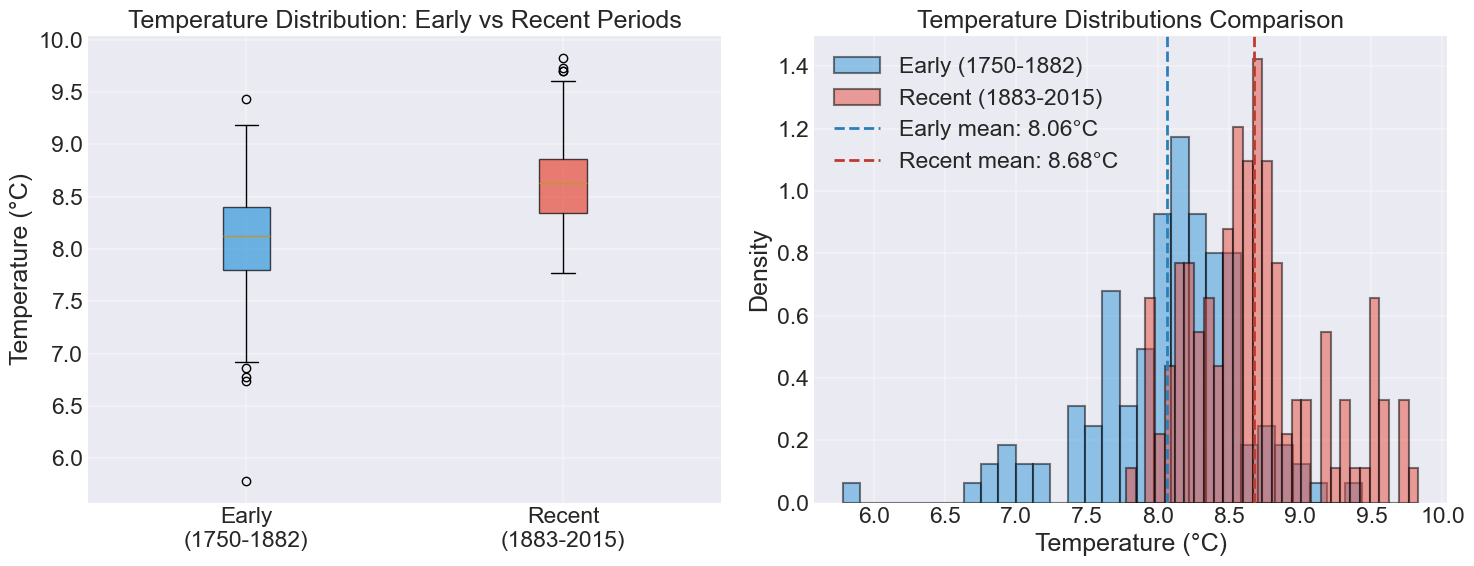

In [570]:
# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Define colors for consistency
colors = ['#3498db', '#e74c3c']  # Blue for Early, Red for Recent

# Box plot comparison
bp = axes[0].boxplot([early_period, recent_period], 
                labels=[f'Early\n({min_year}-{median_year})', 
                       f'Recent\n({median_year + 1}-{max_year})'],
                patch_artist=True)

# Apply colors to box plots
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('Temperature Distribution: Early vs Recent Periods')
axes[0].grid(True, alpha=0.3)

# Distribution plot
axes[1].hist(early_period, bins=30, alpha=0.5, label=f'Early ({min_year}-{median_year})', 
             color=colors[0], density=True, edgecolor='black')
axes[1].hist(recent_period, bins=30, alpha=0.5, label=f'Recent ({median_year + 1}-{max_year})', 
             color=colors[1], density=True, edgecolor='black')
axes[1].axvline(early_period.mean(), color='#2980b9', linestyle='--', linewidth=2, 
                label=f'Early mean: {early_period.mean():.2f}°C')
axes[1].axvline(recent_period.mean(), color='#c0392b', linestyle='--', linewidth=2, 
                label=f'Recent mean: {recent_period.mean():.2f}°C')
axes[1].set_xlabel('Temperature (°C)')
axes[1].set_ylabel('Density')
axes[1].set_title('Temperature Distributions Comparison')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Test 4: Analysis by Decade

Examining temperature changes across each decade using ANOVA to test if there are significant differences.

In [571]:
# Split data into early and recent periods
min_year = annual['year'].min()
max_year = annual['year'].max()
median_year = math.floor(np.median(annual['year']))

# Early period:
early_period = annual[annual['year'] <= median_year]['LandAverageTemperature']

# Recent period:
recent_period = annual[annual['year'] > median_year]['LandAverageTemperature']

print("=" * 60)

# Perform one-way ANOVA
f_statistic, anova_pvalue = stats.f_oneway(early_period, recent_period)

print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"P-value: {anova_pvalue:.2e}")
print("=" * 60)

if anova_pvalue < alpha:
    print(f"REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"There ARE statistically significant differences in temperature across decades.")
else:
    print(f"FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print(f"There are NO statistically significant differences across decades.")

print("=" * 60)

ANOVA F-statistic: 100.5264
P-value: 2.95e-20
REJECT NULL HYPOTHESIS (p < 0.05)
There ARE statistically significant differences in temperature across decades.


ANOVA F-statistic: 100.5264
P-value: 2.95e-20
REJECT NULL HYPOTHESIS (p < 0.05)
There ARE statistically significant differences in temperature across decades.


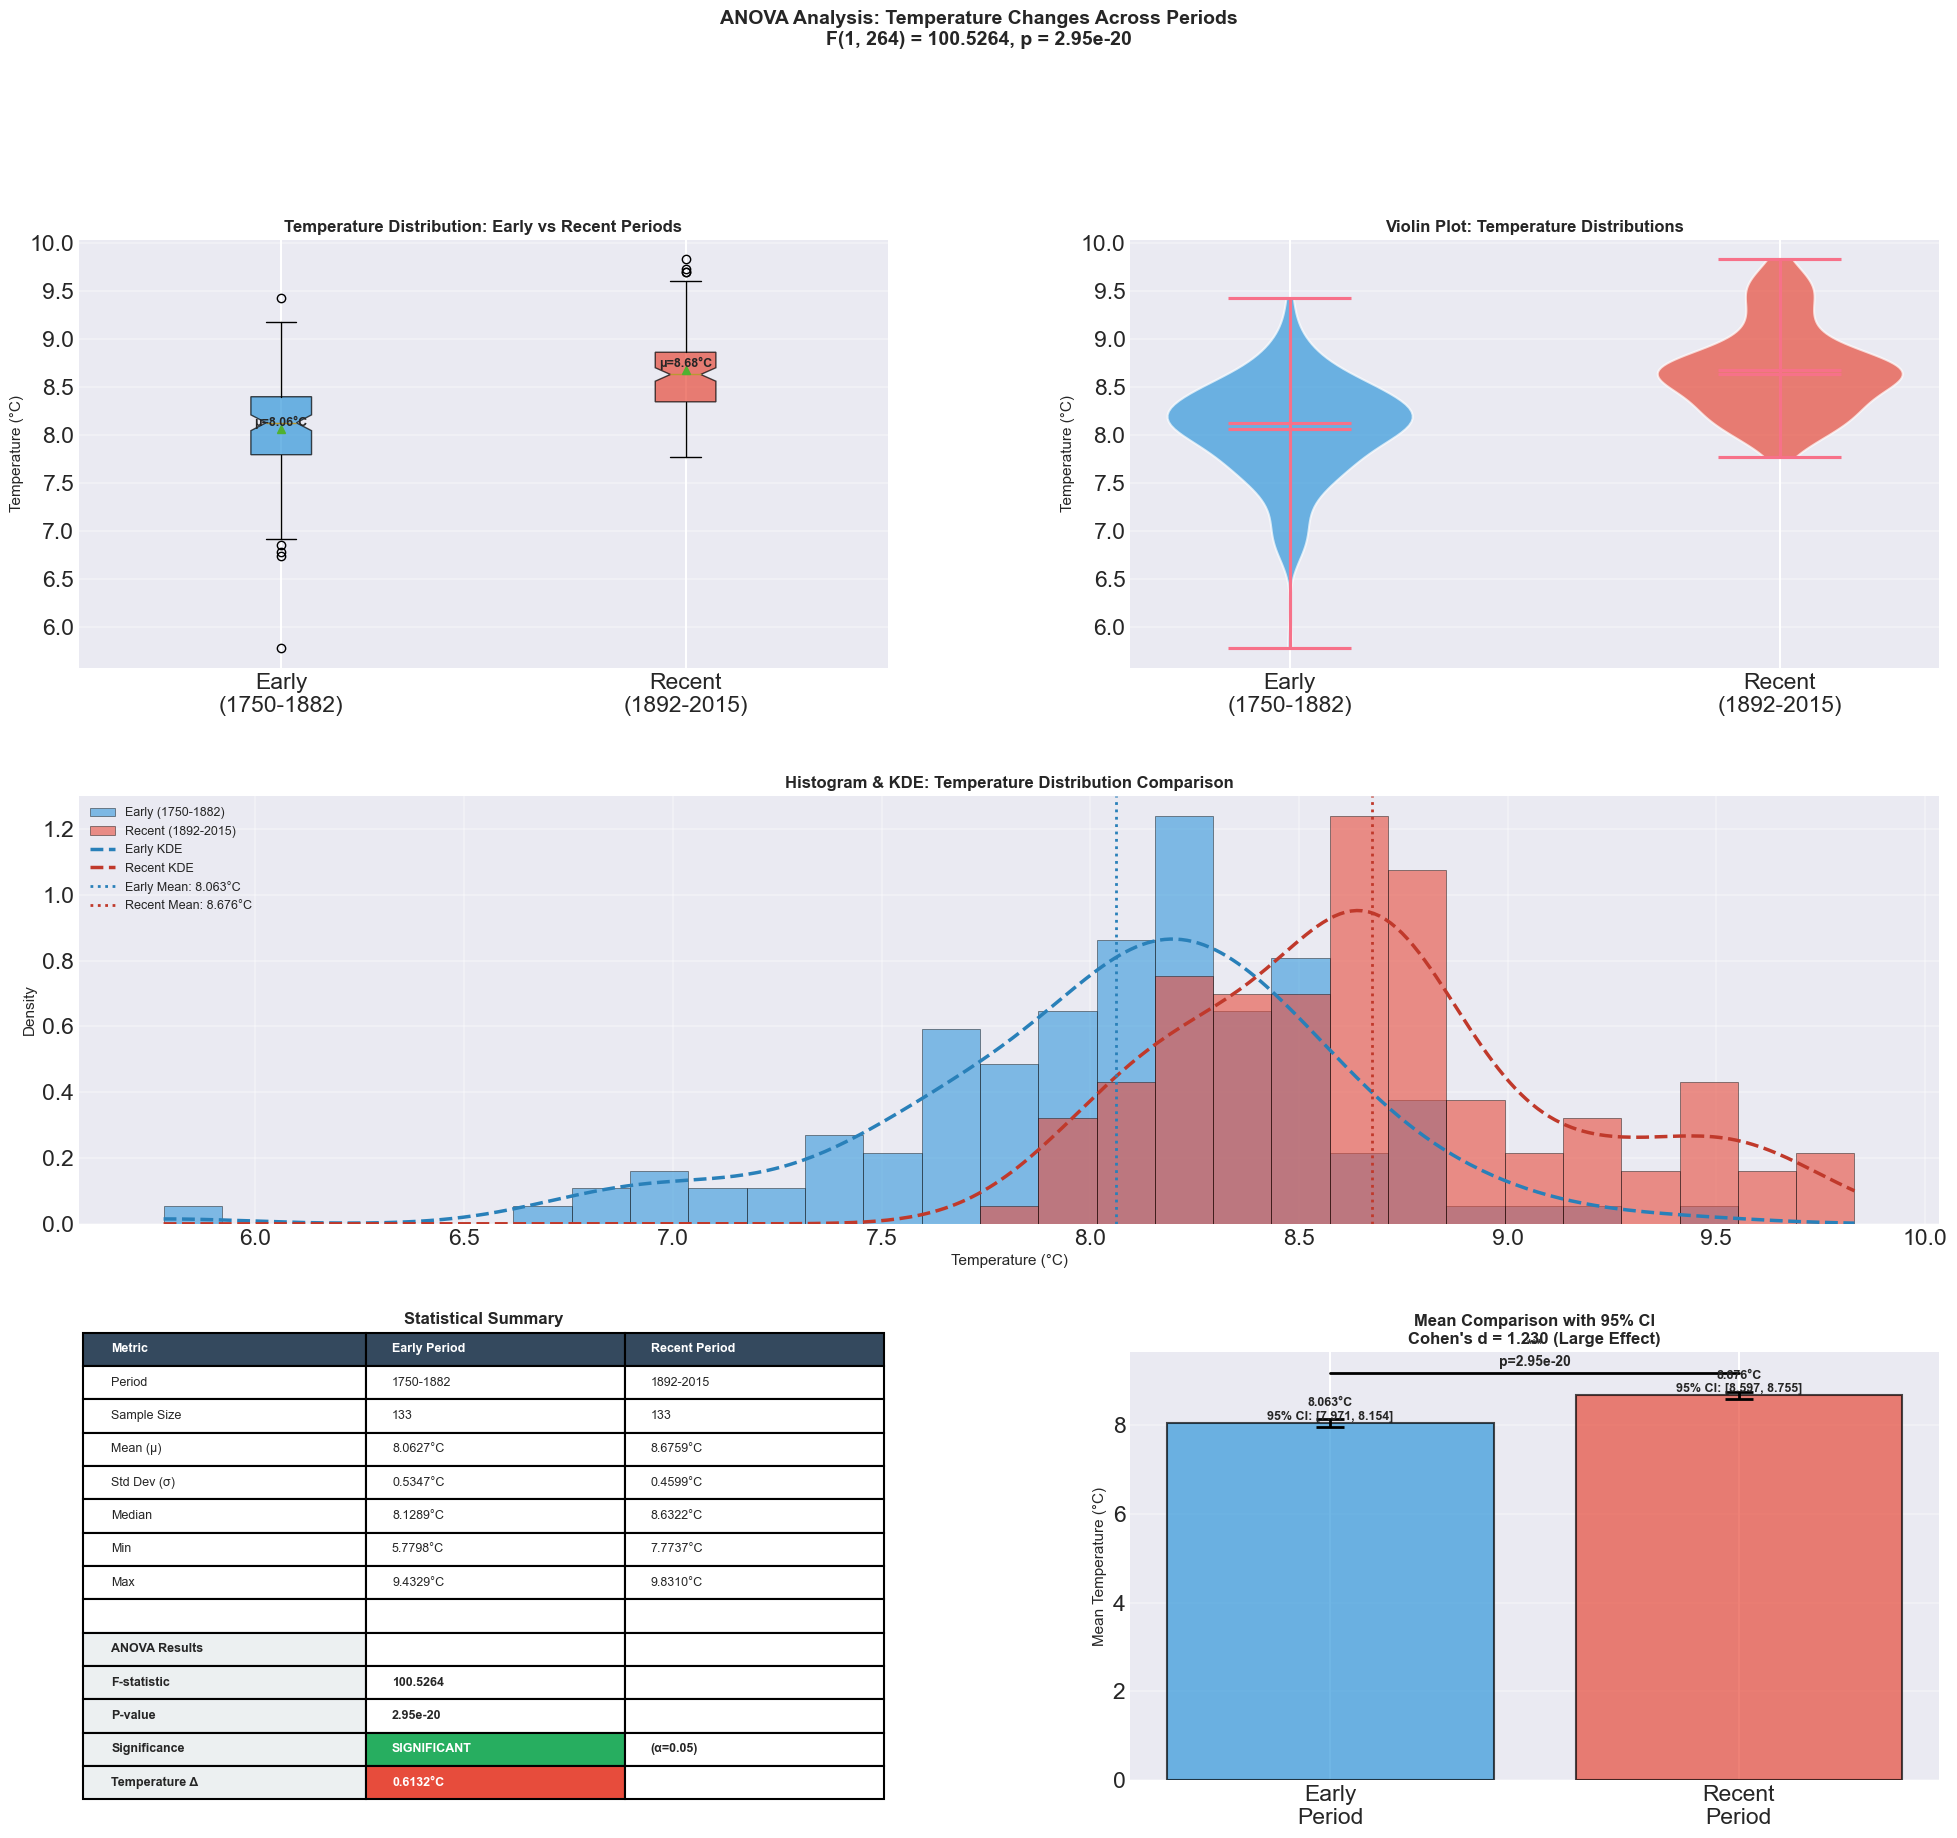

In [572]:
# Split data into early and recent periods
min_year = annual['year'].min()
max_year = annual['year'].max()
median_year = math.floor(np.median(annual['year']))

# Early period:
early_period = annual[annual['year'] <= median_year]['LandAverageTemperature']

# Recent period:
recent_period = annual[annual['year'] > median_year]['LandAverageTemperature']

print("=" * 60)

# Perform one-way ANOVA
f_statistic, anova_pvalue = stats.f_oneway(early_period, recent_period)

print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"P-value: {anova_pvalue:.2e}")
print("=" * 60)

if anova_pvalue < alpha:
    print(f"REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"There ARE statistically significant differences in temperature across decades.")
else:
    print(f"FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print(f"There are NO statistically significant differences across decades.")

print("=" * 60)

# Create comprehensive visualizations
fig = plt.figure(figsize=(24, 20))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Box Plot Comparison
ax1 = fig.add_subplot(gs[0, 0])
box_data = [early_period, recent_period]
bp = ax1.boxplot(box_data, labels=[f'Early\n({min_year}-{median_year})', 
                                     f'Recent\n({median_year+10}-{max_year})'],
                 patch_artist=True, notch=True, showmeans=True)
# Color the boxes
colors = ['#3498db', '#e74c3c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax1.set_ylabel('Temperature (°C)', fontsize=11)
ax1.set_title('Temperature Distribution: Early vs Recent Periods', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
# Add mean values as text
for i, data in enumerate([early_period, recent_period]):
    ax1.text(i+1, data.mean(), f'μ={data.mean():.2f}°C', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Violin Plot with Data Points
ax2 = fig.add_subplot(gs[0, 1])
period_data = pd.DataFrame({
    'Period': ['Early']*len(early_period) + ['Recent']*len(recent_period),
    'Temperature': list(early_period) + list(recent_period)
})
parts = ax2.violinplot([early_period, recent_period], 
                       positions=[1, 2], 
                       showmeans=True, showmedians=True, showextrema=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)
ax2.set_xticks([1, 2])
ax2.set_xticklabels([f'Early\n({min_year}-{median_year})', 
                     f'Recent\n({median_year+10}-{max_year})'])
ax2.set_ylabel('Temperature (°C)', fontsize=11)
ax2.set_title('Violin Plot: Temperature Distributions', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Histogram Comparison with KDE
ax3 = fig.add_subplot(gs[1, :])
bins = np.linspace(min(early_period.min(), recent_period.min()), 
                   max(early_period.max(), recent_period.max()), 30)
ax3.hist(early_period, bins=bins, alpha=0.6, label=f'Early ({min_year}-{median_year})', 
         color='#3498db', density=True, edgecolor='black', linewidth=0.5)
ax3.hist(recent_period, bins=bins, alpha=0.6, label=f'Recent ({median_year+10}-{max_year})', 
         color='#e74c3c', density=True, edgecolor='black', linewidth=0.5)

# Add KDE curves
from scipy.stats import gaussian_kde
kde_early = gaussian_kde(early_period)
kde_recent = gaussian_kde(recent_period)
x_range = np.linspace(min(early_period.min(), recent_period.min()), 
                      max(early_period.max(), recent_period.max()), 300)
ax3.plot(x_range, kde_early(x_range), color='#2980b9', linewidth=2.5, 
         label='Early KDE', linestyle='--')
ax3.plot(x_range, kde_recent(x_range), color='#c0392b', linewidth=2.5, 
         label='Recent KDE', linestyle='--')

# Add vertical lines for means
ax3.axvline(early_period.mean(), color='#2980b9', linestyle=':', linewidth=2, 
           label=f'Early Mean: {early_period.mean():.3f}°C')
ax3.axvline(recent_period.mean(), color='#c0392b', linestyle=':', linewidth=2, 
           label=f'Recent Mean: {recent_period.mean():.3f}°C')

ax3.set_xlabel('Temperature (°C)', fontsize=11)
ax3.set_ylabel('Density', fontsize=11)
ax3.set_title('Histogram & KDE: Temperature Distribution Comparison', fontsize=12, fontweight='bold')
ax3.legend(loc='upper left', fontsize=9)
ax3.grid(True, alpha=0.3)

# 4. Statistical Summary Table
ax4 = fig.add_subplot(gs[2, 0])
ax4.axis('off')

stats_summary = [
    ['Metric', 'Early Period', 'Recent Period'],
    ['Period', f'{min_year}-{median_year}', f'{median_year+10}-{max_year}'],
    ['Sample Size', f'{len(early_period)}', f'{len(recent_period)}'],
    ['Mean (μ)', f'{early_period.mean():.4f}°C', f'{recent_period.mean():.4f}°C'],
    ['Std Dev (σ)', f'{early_period.std():.4f}°C', f'{recent_period.std():.4f}°C'],
    ['Median', f'{early_period.median():.4f}°C', f'{recent_period.median():.4f}°C'],
    ['Min', f'{early_period.min():.4f}°C', f'{recent_period.min():.4f}°C'],
    ['Max', f'{early_period.max():.4f}°C', f'{recent_period.max():.4f}°C'],
    ['', '', ''],
    ['ANOVA Results', '', ''],
    ['F-statistic', f'{f_statistic:.4f}', ''],
    ['P-value', f'{anova_pvalue:.2e}', ''],
    ['Significance', f'{"SIGNIFICANT" if anova_pvalue < alpha else "NOT SIGNIFICANT"}', f'(α={alpha})'],
    ['Temperature Δ', f'{recent_period.mean() - early_period.mean():.4f}°C', '']
]

table = ax4.table(cellText=stats_summary, cellLoc='left', loc='center',
                  colWidths=[0.35, 0.32, 0.32])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Color header row
for i in range(3):
    table[(0, i)].set_facecolor('#34495e')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color ANOVA section
for i in range(9, 14):
    table[(i, 0)].set_facecolor('#ecf0f1')
    if i >= 9:
        for j in range(3):
            table[(i, j)].set_text_props(weight='bold')

# Highlight significance
if anova_pvalue < alpha:
    table[(12, 1)].set_facecolor('#27ae60')
    table[(12, 1)].set_text_props(color='white', weight='bold')
    table[(13, 1)].set_facecolor('#e74c3c')
    table[(13, 1)].set_text_props(color='white', weight='bold')

ax4.set_title('Statistical Summary', fontsize=12, fontweight='bold', pad=20)

# 5. Effect Size and Confidence Intervals
ax5 = fig.add_subplot(gs[2, 1])

# Calculate Cohen's d (effect size)
pooled_std = np.sqrt((early_period.std()**2 + recent_period.std()**2) / 2)
cohens_d = (recent_period.mean() - early_period.mean()) / pooled_std

# Calculate 95% CI for means
from scipy.stats import t as t_dist
ci_early = t_dist.interval(0.95, len(early_period)-1, 
                           loc=early_period.mean(), 
                           scale=stats.sem(early_period))
ci_recent = t_dist.interval(0.95, len(recent_period)-1, 
                            loc=recent_period.mean(), 
                            scale=stats.sem(recent_period))

# Plot means with error bars
periods = ['Early\nPeriod', 'Recent\nPeriod']
means = [early_period.mean(), recent_period.mean()]
errors = [(early_period.mean() - ci_early[0], ci_recent[1] - recent_period.mean()),
          (recent_period.mean() - ci_recent[0], ci_recent[1] - recent_period.mean())]

bars = ax5.bar(periods, means, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax5.errorbar(periods, means, yerr=errors, fmt='none', ecolor='black', 
             capsize=10, capthick=2, linewidth=2)

# Add value labels on bars
for i, (bar, mean, color) in enumerate(zip(bars, means, colors)):
    ax5.text(bar.get_x() + bar.get_width()/2, mean, 
             f'{mean:.3f}°C\n95% CI: [{ci_early[0] if i==0 else ci_recent[0]:.3f}, '
             f'{ci_early[1] if i==0 else ci_recent[1]:.3f}]',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

ax5.set_ylabel('Mean Temperature (°C)', fontsize=11)
ax5.set_title(f'Mean Comparison with 95% CI\nCohen\'s d = {cohens_d:.3f} '
              f'({"Small" if abs(cohens_d) < 0.5 else "Medium" if abs(cohens_d) < 0.8 else "Large"} Effect)', 
              fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')

# Add significance annotation
if anova_pvalue < alpha:
    y_max = max(means) + max([e[1] for e in errors])
    ax5.plot([0, 1], [y_max*1.05, y_max*1.05], 'k-', linewidth=2)
    ax5.text(0.5, y_max*1.06, f'***\np={anova_pvalue:.2e}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle(f'ANOVA Analysis: Temperature Changes Across Periods\n'
             f'F({1}, {len(early_period)+len(recent_period)-2}) = {f_statistic:.4f}, '
             f'p = {anova_pvalue:.2e}',
             fontsize=14, fontweight='bold', y=0.995)

plt.show()

## Summary of Hypothesis Testing Results

Consolidated results from all statistical tests performed.

In [573]:
print("=" * 70)
print("COMPREHENSIVE HYPOTHESIS TESTING SUMMARY")
print("=" * 70)
print()
print("NULL HYPOTHESIS (H₀): No significant changes in temperature over time")
print("ALTERNATIVE HYPOTHESIS (H₁): Significant changes exist over time")
print(f"Significance level (α): {alpha}")
print()
print("-" * 70)
print()

# Summary table with actual test statistics
summary_data = {
    'Test': [
        'Linear Regression',
        'Mann-Kendall Trend',
        'T-test (Early vs Recent)',
        'ANOVA (Across Periods)'
    ],
    'Test Statistic': [
        f"Slope = {slope:.6f}",
        f"Kendall's τ = {result.Tau:.4f}",
        f"t = {t_statistic:.4f}",
        f"F = {f_statistic:.4f}"
    ],
    'P-value': [
        f"{p_value:.2e}",
        f"{result.p:.2e}",
        f"{t_pvalue:.2e}",
        f"{anova_pvalue:.2e}"
    ],
    'Decision': [
        'Reject H₀' if p_value < alpha else 'Fail to reject H₀',
        'Reject H₀' if result.p < alpha else 'Fail to reject H₀',
        'Reject H₀' if t_pvalue < alpha else 'Fail to reject H₀',
        'Reject H₀' if anova_pvalue < alpha else 'Fail to reject H₀'
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))
print()
print("-" * 70)
print()

# Overall conclusion
all_reject = all([
    p_value < alpha,
    result.p < alpha,
    t_pvalue < alpha,
    anova_pvalue < alpha
])

if all_reject:
    print("OVERALL CONCLUSION:")
    print("✓ ALL TESTS REJECT THE NULL HYPOTHESIS")
    print()
    print("There is STRONG STATISTICAL EVIDENCE of significant temperature changes")
    print("over time. Multiple independent tests confirm this finding.")
    print()
    print(f"Key findings:")
    print(f"  • Linear trend: {slope:.6f} °C/year (p = {p_value:.2e})")
    print(f"  • Sen's slope (Mann-Kendall): {result.slope:.6f} °C/year")
    print(f"  • Temperature increase from early to recent period: {recent_period.mean() - early_period.mean():.4f} °C")
    print(f"  • Early period mean ({min_year}-{median_year}): {early_period.mean():.4f} °C")
    print(f"  • Recent period mean ({median_year+1}-{max_year}): {recent_period.mean():.4f} °C")
    print(f"  • All statistical tests show p-values < {alpha}")
else:
    print("OVERALL CONCLUSION:")
    print("Results are MIXED or INCONCLUSIVE")
    print("Not all tests reject the null hypothesis.")

print("=" * 70)

COMPREHENSIVE HYPOTHESIS TESTING SUMMARY

NULL HYPOTHESIS (H₀): No significant changes in temperature over time
ALTERNATIVE HYPOTHESIS (H₁): Significant changes exist over time
Significance level (α): 0.05

----------------------------------------------------------------------

                    Test       Test Statistic  P-value  Decision
       Linear Regression     Slope = 0.004732 6.47e-30 Reject H₀
      Mann-Kendall Trend Kendall's τ = 0.4823 0.00e+00 Reject H₀
T-test (Early vs Recent)         t = -10.0263 2.95e-20 Reject H₀
  ANOVA (Across Periods)         F = 100.5264 2.95e-20 Reject H₀

----------------------------------------------------------------------

OVERALL CONCLUSION:
✓ ALL TESTS REJECT THE NULL HYPOTHESIS

There is STRONG STATISTICAL EVIDENCE of significant temperature changes
over time. Multiple independent tests confirm this finding.

Key findings:
  • Linear trend: 0.004732 °C/year (p = 6.47e-30)
  • Sen's slope (Mann-Kendall): 0.005203 °C/year
  • Temperature i